In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [26]:
#aggregate_daily_trips_per_day_df = pd.read_excel('Aggregate FHV Data.xlsx', index_col='Date')
aggregate_daily_trips_per_day_df = pd.read_excel('Aggregate FHV Data.xlsx')
aggregate_daily_trips_per_day_df['Date'] = pd.to_datetime(aggregate_daily_trips_per_day_df['Date'])
aggregate_daily_trips_per_day_df.head()

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
0,2014-07-01,921,2871,2233,1046,1744,1368,3345,1668,0,21228,440655,38167
1,2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480,434416,42472
2,2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597,412980,46046
3,2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148,306773,41535
4,2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890,305653,46873


In [27]:
#type(aggregate_daily_trips_per_day_df['American'])

In [28]:
# ax.plot_date(x=aggregate_daily_trips_per_day_df['Date'], y=aggregate_daily_trips_per_day_df, fmt="r-")
# plt.show()

#timeseries plot of 'American' rides for entire period
timeseries = aggregate_daily_trips_per_day_df.set_index('Date')
# fig = plt.figure(figsize=(200,100))
# ax = plt.subplot(111)
# ax.set_yscale('log', basey=2)
# plt.yscale('log')
# for i in taxi_providers:
#     ax.plot(timeseries[i])
# plt.show()
timeseries.plot(figsize=(200,100), logy=True, legend=True);
#ax = fig.add_subplot(111)

In [29]:
#df_sum = aggregate_daily_trips_per_day_df.sum(1)
#fig = plt.figure(figsize=(200, 100))
#ax = fig.add_subplot(111)
#ax.plot_date(aggregate_daily_trips_per_day_df['Date'], df_sum, fmt="r-")
#plt.show()
#timeseries plot of total rides per day

In [30]:
#sum number of rides per day
aggregate_daily_trips_per_day_df['weekday'] = aggregate_daily_trips_per_day_df['Date'].apply(lambda x: x.weekday())
aggregate_daily_trips_per_day_df['DayOfWeek'] = aggregate_daily_trips_per_day_df['Date'].dt.weekday_name
weekday = aggregate_daily_trips_per_day_df.groupby('weekday')
sum_of_all_trip_per_company = weekday.sum()

In [31]:
sum_of_all_trip_per_company

,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
weekday,,,,,,,,,,,,
0,11055,39139,28977,12507,22960,19930,41316,16693,29945,322110,4980213,455553
1,12011,39347,28936,13226,24718,20261,43591,20573,30566,407808,5902403,511843
2,11373,38394,29476,12448,23782,18890,40733,23299,30585,398346,5672786,501128
3,11844,41859,32018,12432,23734,19246,41735,24529,36511,425832,5763263,540978
4,14366,38267,29869,14642,25381,22740,48317,19649,42847,411789,5724966,621218
5,16552,28321,21347,17127,24227,25897,54289,12115,51204,384542,5652648,728618
6,14511,31192,24369,16168,21967,24961,50660,10838,46043,303105,5072423,616326


In [32]:
taxi_providers = ['American','Carmel','Dial 7','Diplo','Firstclass','Green Taxis','Highclass','Prestige','Skyline','Lyft','Uber','Yellow Taxis']
sum_of_all_trip_per_company["Total rides"] = sum_of_all_trip_per_company[taxi_providers].sum(1)
sum_of_all_trip_per_day = sum_of_all_trip_per_company["Total rides"].to_frame("Total rides")
sum_of_all_trip_per_company = sum_of_all_trip_per_company.drop("Total rides", axis =1)

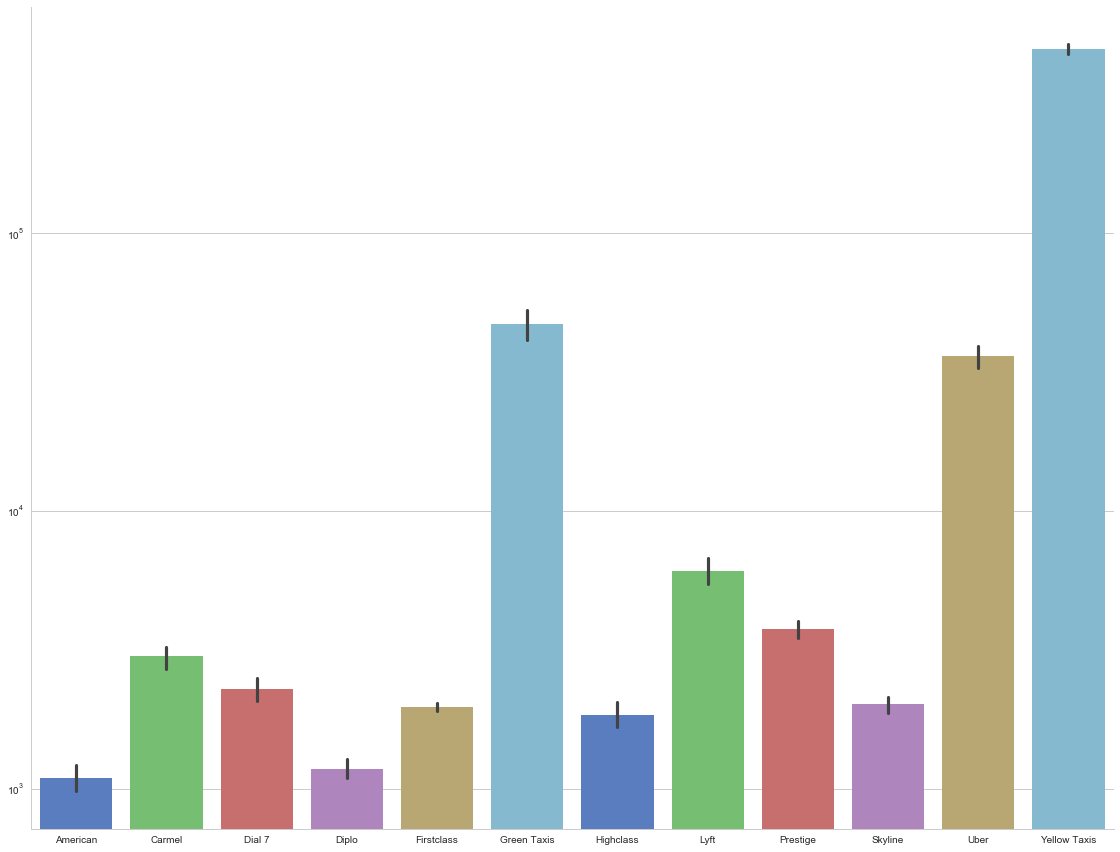

In [33]:
percentile = weekday.quantile([.95])
sns.set(style="whitegrid")
percentile_plot = sns.factorplot(data = percentile, kind="bar",size=12, aspect=1.33, palette="muted")
percentile_plot.fig.get_axes()[0].set_yscale('log')
plt.show()

In [34]:
#weekday.apply(lambda g: print(g.head()))
def checkQuantile(series, quantile):
    return series[series <= int(quantile)].sum()

sum_trips = sum_of_all_trip_per_company.copy()
for name,group in weekday:
    #print(i)
    #print(j.quantile([.95]))
    #print(j.American.apply(lambda x: x <= j['American'].quantile([.95])))
    for column in taxi_providers:
        q = group[column].quantile([.99])
        #print(q)
        sum_trips[column][name] = checkQuantile(group[column], q)
        #print(j[i])
sum_of_all_trip_per_day["Without outliers"] = sum_trips[taxi_providers].sum(1)

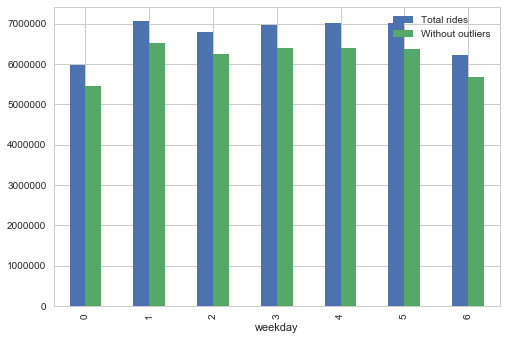

In [35]:
sum_of_all_trip_per_day.plot.bar()

In [36]:
sum_of_all_trip_per_day

,Total rides,Without outliers
weekday,,
0,5980398,5464346
1,7055283,6511939
2,6801240,6237879
3,6973981,6390084
4,7014051,6402963
5,7016887,6374178
6,6232563,5679783
